### [D0827] 과제
- 데이터셋 : scikit-learn의 load_diabetes 활용
- 학습방법 : 지도학습 > 회귀
- 알고리즘 : KNNRegressor
- 목적 : 복습

[1] 데이터 준비

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
# 기본 : ndarray 형태로 반환
# 반환값 : Bunch 객체로 dict와 유사
diadict = load_diabetes()
diadict.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [4]:
diadict.values()

dict_values([array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       1

In [5]:
# 기본 : DataFrame 형태로 반환
diaDF = load_diabetes(as_frame=True, scaled=False)

In [6]:
key_list = list(diaDF.keys())

In [7]:
value_list = list(diaDF.values())

In [8]:
key_list

['data',
 'target',
 'frame',
 'DESCR',
 'feature_names',
 'data_filename',
 'target_filename',
 'data_module']

In [9]:
value_list

[      age  sex   bmi      bp     s1     s2    s3    s4      s5     s6
 0    59.0  2.0  32.1  101.00  157.0   93.2  38.0  4.00  4.8598   87.0
 1    48.0  1.0  21.6   87.00  183.0  103.2  70.0  3.00  3.8918   69.0
 2    72.0  2.0  30.5   93.00  156.0   93.6  41.0  4.00  4.6728   85.0
 3    24.0  1.0  25.3   84.00  198.0  131.4  40.0  5.00  4.8903   89.0
 4    50.0  1.0  23.0  101.00  192.0  125.4  52.0  4.00  4.2905   80.0
 ..    ...  ...   ...     ...    ...    ...   ...   ...     ...    ...
 437  60.0  2.0  28.2  112.00  185.0  113.8  42.0  4.00  4.9836   93.0
 438  47.0  2.0  24.9   75.00  225.0  166.0  42.0  5.00  4.4427  102.0
 439  60.0  2.0  24.9   99.67  162.0  106.6  43.0  3.77  4.1271   95.0
 440  36.0  1.0  30.0   95.00  201.0  125.2  42.0  4.79  5.1299   85.0
 441  36.0  1.0  19.6   71.00  250.0  133.2  97.0  3.00  4.5951   92.0
 
 [442 rows x 10 columns],
 0      151.0
 1       75.0
 2      141.0
 3      206.0
 4      135.0
        ...  
 437    178.0
 438    104.0
 439    

In [10]:
value_list[0]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


In [11]:
value_list[0].corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


In [12]:
value_list[1]

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [13]:
makeDF = pd.concat([value_list[0], value_list[1]], join='outer', axis=1)
makeDF

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


In [14]:
makeDF.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


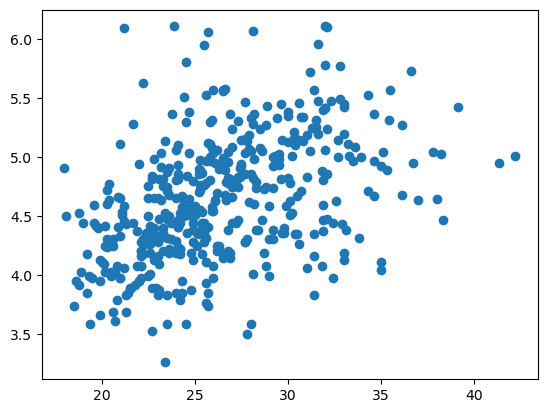

In [15]:
# bmi-target: 0.586450,  s5-target: 0.565883, => bmi-s5: 0.446157

plt.scatter(makeDF['bmi'], makeDF['s5'])
plt.show()

In [16]:
bmi_s5=makeDF[['bmi','s5']]
bmi_s5

,bmi,s5
0,32.1,4.8598
1,21.6,3.8918
2,30.5,4.6728
3,25.3,4.8903
4,23.0,4.2905
...,...,...
437,28.2,4.9836
438,24.9,4.4427
439,24.9,4.1271
440,30.0,5.1299


In [17]:
bmi_s5.corr()

,bmi,s5
bmi,1.000000,0.446157
s5,0.446157,1.000000


[2] 학습 준비
- 학습알고리즘 : KNN Regressor
- 피쳐 : 스케일링
- 학습용/테스트용 데이터셋 분리

[2-1] 피쳐와 타겟 분리

In [18]:
features = bmi_s5[['bmi']]
target = bmi_s5['s5']

print(f'feature => {features.shape}, {features.ndim}D')
print(f'target => {target.shape}, {target.ndim}D')

feature => (442, 1), 2D
target => (442,), 1D


[2-2] 학습용/테스트용 데이터셋 분리
- 전체 데이터셋 => 학습용/테스트용 비율 (75:25[default], 80:20, 70:30, ...)
- 회귀 데이터셋 => 데이터셋 구성 요소에 대한 비율은 고려 X

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# train:test = 80:20 ==> test_size=0.2 또는 train_size=0.8
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=10)

[2-3] 피쳐 스케일링

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
# 스케일러 인스턴스 생성
mmScaler = MinMaxScaler()

In [23]:
mmScaler.fit(x_train)

MinMaxScaler()

In [24]:
# 데이터에 기반한 MinMaxScaler 동작을 위한 학습 진행
mmScaler.min_, mmScaler.data_min_, mmScaler.scale_, mmScaler.data_max_

(array([-0.74380165]), array([18.]), array([0.04132231]), array([42.2]))

In [25]:
x_train.min(), x_train.max()

(bmi    18.0
 dtype: float64,
 bmi    42.2
 dtype: float64)

In [26]:
# 학습용 데이터셋 ==> 스케일링 ==> ndarray 타입 반환
x_train_scaled=mmScaler.transform(x_train)
x_train_scaled.shape

(353, 1)

In [27]:
# 테스트용 데이터셋 ==> 스케일링 ==> ndarray 타입 반환
x_test_scaled=mmScaler.transform(x_test)
x_test_scaled.shape, x_test_scaled.min(), x_test_scaled.max()

((89, 1), 0.024793388429752206, 0.8347107438016529)

[4] 훈련/학습 진행
- 학습 알고리즘 인스턴스 생성
- 학습진행 => fit()

In [31]:
from sklearn.neighbors import KNeighborsRegressor

In [32]:
# 학습 모델 인스턴스 생성
model = KNeighborsRegressor()

In [33]:
# 학습용 데이터셋으로 학습 진행
model.fit(x_train_scaled, y_train)

KNeighborsRegressor()

In [34]:
# 모델 파라미터 => 학습 후 즉, fit() 실행 후 설정되는 매개변수
model.n_features_in_, model.n_samples_fit_, model.effective_metric_, model.effective_metric_params_

(1, 353, 'euclidean', {})

In [35]:
scores={}
for k in range(1, model.n_samples_fit_+1):
    # 최근접 이웃의 갯수 설정 => 모델 성능 좌우 : 하이퍼 파라미터
    model.n_neighbors=k

    # 성능 평가
    score=model.score(x_test_scaled, y_test)
    scores[k]=score

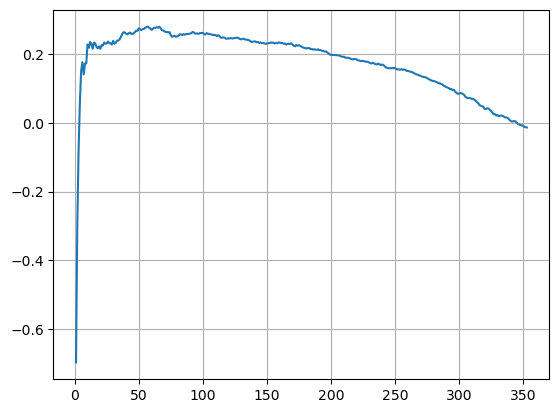

In [36]:
plt.plot(list(scores.keys()), list(scores.values()))
plt.grid()
plt.show()

In [37]:
# 최고 성능의 K값
best_k = sorted(scores.items(), key=lambda x:x[1], reverse=True)[0][0]
best_k

57